# Explore here

In [56]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", delimiter=";")
total_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [57]:
total_data.shape

(41188, 21)

In [58]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [59]:
total_data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [60]:
total_data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
# Group by two columns and get value counts for each group
grouped_counts = total_data.groupby(['default']).size()

print(grouped_counts)

default
no         32588
unknown     8597
yes            3
dtype: int64


In [62]:
grouped_counts = total_data.groupby(['job']).size()

print(grouped_counts)

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64


In [63]:
grouped_counts = total_data.groupby(['marital']).size()

print(grouped_counts)

marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64


In [64]:
grouped_counts = total_data.groupby(['education']).size()

print(grouped_counts)

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64


In [65]:
grouped_counts = total_data.groupby(['housing']).size()

print(grouped_counts)

housing
no         18622
unknown      990
yes        21576
dtype: int64


In [66]:
grouped_counts = total_data.groupby(['loan']).size()

print(grouped_counts)

loan
no         33950
unknown      990
yes         6248
dtype: int64


In [67]:
grouped_counts = total_data.groupby(['contact']).size()

print(grouped_counts)

contact
cellular     26144
telephone    15044
dtype: int64


In [68]:
grouped_counts = total_data.groupby(['month']).size()

print(grouped_counts)

month
apr     2632
aug     6178
dec      182
jul     7174
jun     5318
mar      546
may    13769
nov     4101
oct      718
sep      570
dtype: int64


In [69]:
grouped_counts = total_data.groupby(['day_of_week']).size()

print(grouped_counts)

day_of_week
fri    7827
mon    8514
thu    8623
tue    8090
wed    8134
dtype: int64


In [70]:
grouped_counts = total_data.groupby(['poutcome']).size()

print(grouped_counts)

poutcome
failure         4252
nonexistent    35563
success         1373
dtype: int64


After reviewing both columns of the last month contacted along with the 'day of week', not only are values missing for certain months and days respectively, but this data lacks information pertaining to what year the customer was contacted and really does not seem to hold much value in our analysis.

In [71]:
# After address the categorical columns, it was decided to remove the following
df = total_data.drop(["default", "month", "day_of_week"], axis= 1)
df

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


I decided after reviewing the value counts within the 'default' column that the data appears to be overly weighted towards potential customers not having credit and another approximate 20% having unknowns within the data set.

In [72]:
 # Example of factorizing a categorical column called "Sex"
df["job"] = pd.factorize(df["job"])[0]
df

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,married,basic.4y,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,1,married,high.school,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,1,married,high.school,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,2,married,basic.6y,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,1,married,high.school,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,married,professional.course,yes,no,cellular,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,3,married,professional.course,no,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,married,university.degree,yes,no,cellular,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,4,married,professional.course,no,no,cellular,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [73]:
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["contact"] = pd.factorize(df["contact"])[0]
df["duration"] = pd.factorize(df["duration"])[0]
df["campaign"] = pd.factorize(df["campaign"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]
df["y"] = pd.factorize(df["y"])[0]
df

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,0,0,0,1,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,1,0,0,2,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,3,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,1,0,4,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,1,0,1,629,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,1,339,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,6,1,0,1,191,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,1,273,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [74]:
print(df['age'].describe())
print(df['duration'].describe())
print(df['campaign'].describe())
print(df['pdays'].describe())
print(df['previous'].describe())
print(df['emp.var.rate'].describe())
print(df['cons.price.idx'].describe())
print(df['cons.conf.idx'].describe())
print(df['euribor3m'].describe())
print(df['nr.employed'].describe())

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
count    41188.000000
mean       327.646766
std        270.776203
min          0.000000
25%        131.000000
50%        263.000000
75%        439.000000
max       1543.000000
Name: duration, dtype: float64
count    41188.000000
mean         1.594931
std          2.957693
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         41.000000
Name: campaign, dtype: float64
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previo

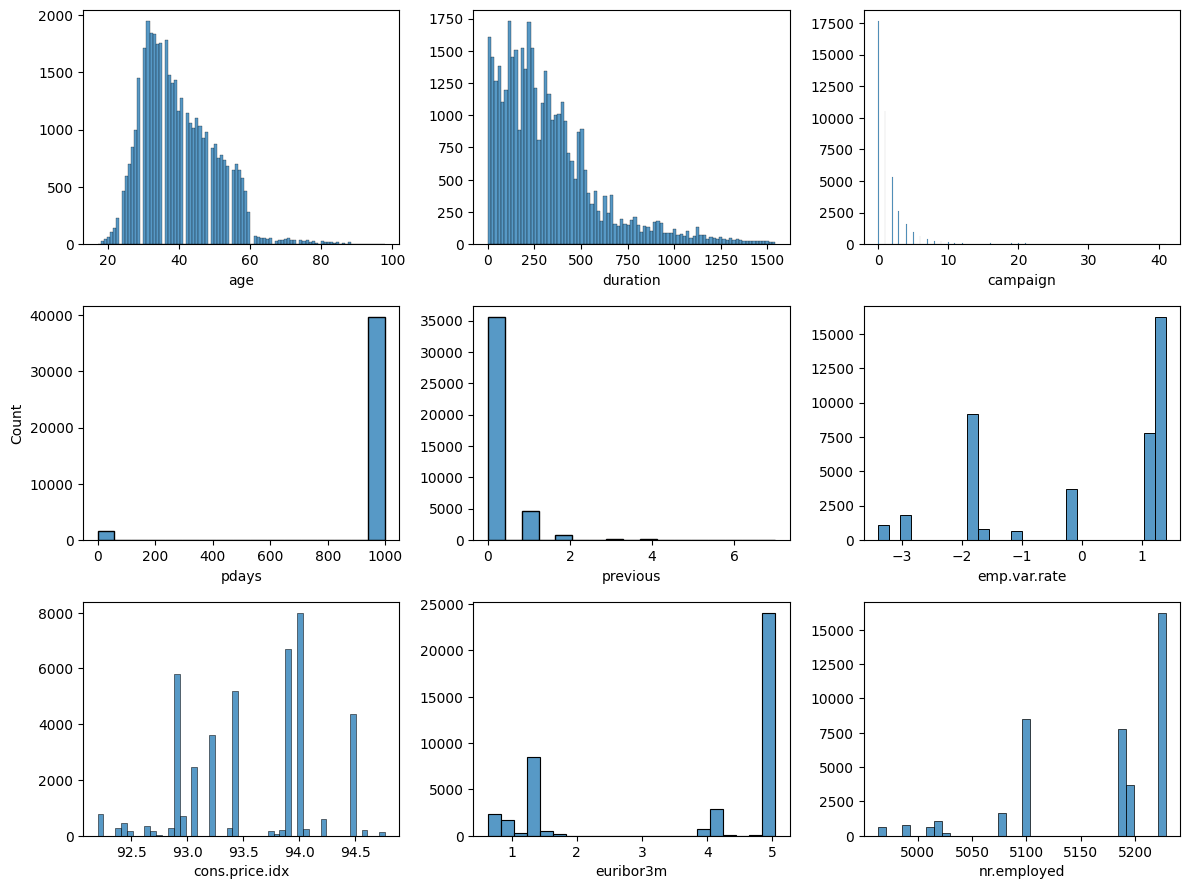

In [79]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (12, 9))

sns.histplot(ax = axis[0, 0], data = df, x="age").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "duration").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "campaign").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "pdays")
sns.histplot(ax = axis[1, 1], data = df, x = "previous").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "emp.var.rate").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = df, x = "cons.price.idx").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "euribor3m").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = df, x = "nr.employed").set(ylabel = None)

plt.tight_layout()

plt.show()

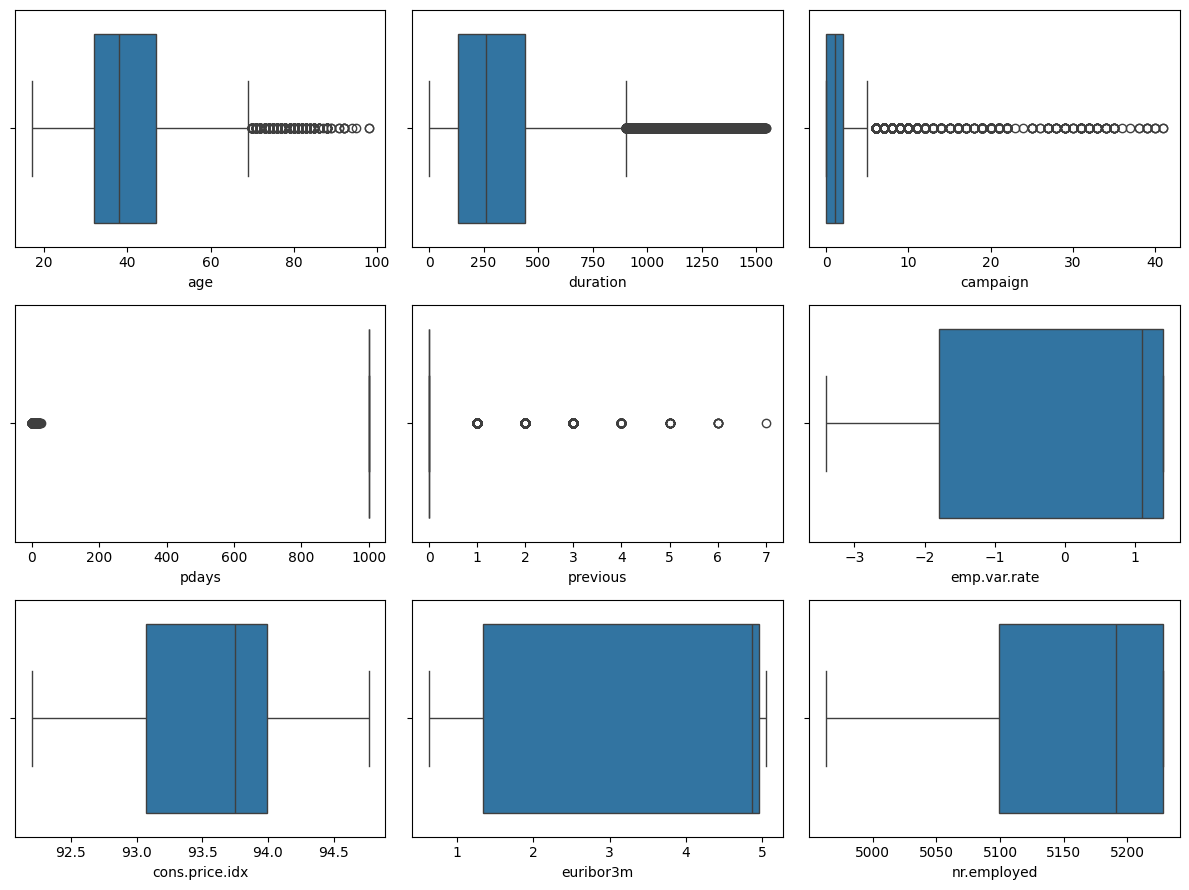

In [76]:
fig, axis = plt.subplots(3, 3, figsize = (12, 9))

sns.boxplot(ax = axis[0, 0], data=df, x="age").set(ylabel = None)
sns.boxplot(ax = axis[0, 1], data = df, x = "duration").set(ylabel = None)
sns.boxplot(ax = axis[0, 2], data = df, x = "campaign").set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "pdays")
sns.boxplot(ax = axis[1, 1], data = df, x = "previous").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "emp.var.rate").set(ylabel = None)
sns.boxplot(ax = axis[2, 0], data = df, x = "cons.price.idx").set(ylabel = None)
sns.boxplot(ax = axis[2, 1], data = df, x = "euribor3m").set(ylabel = None)
sns.boxplot(ax = axis[2, 2], data = df, x = "nr.employed").set(ylabel = None)

plt.tight_layout()

plt.show()

After reviewing the histograms and boxplots above, it's apparent that the column 'pdays' seems to be quite odd and may need to be further investigated to see whether it should be kept or dropped from the data.

In [80]:
df['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

Seems quite strange that approximately 95% of the column contains an arbitrary 999 days since the last campaign since the customer was last contacted, making me very suspicious that this data holds a lot of incomplete values, leading me to want to drop it from the list of numeric columns.

In [78]:
'''
For numeric column analysis, you want to explore the numeric columns: age , duration, campaign, pdays, 
previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed .
Check that their data type is correct; make sure they are numeric and weren't mistakenly read as strings (for example)
Plot a histogram or box plot of each numeric column to identify any odd distributions. Feel free to drop columns that look odd to you.
'''

"\nFor numeric column analysis, you want to explore the numeric columns: age , duration, campaign, pdays, \nprevious, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed .\nCheck that their data type is correct; make sure they are numeric and weren't mistakenly read as strings (for example)\nPlot a histogram or box plot of each numeric column to identify any odd distributions. Feel free to drop columns that look odd to you.\n"

In [82]:
df = total_data.drop(["pdays"], axis= 1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Column Descriptions:

1. age. Age of customer (numeric)
2. job. Type of job (categorical)
3. marital. Marital status (categorical)
4. education. Level of education (categorical)
5. default. do you currently have credit (categorical)
6. housing. do you have a housing loan (categorical)
7. loan. Do you have a personal loan? (categorical)
8. contact. Type of contact communication (categorical)
9. month. Last month in which you have been contacted (categorical)
10. day_of_week. Last day on which you have been contacted (categorical)
11. duration. Duration of previous contact in seconds (numeric)
12. campaign. Number of contacts made during this campaign to the customer (numeric)
13. pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
14. previous. Number of contacts made during the previous campaign to the customer (numeric)
15. poutcome. Result of the previous marketing campaign (categorical)
16. emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
17. cons.price.idx. Consumer price index. Monthly indicator (numeric)
18. cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
19. euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
20. nr.employed. Number of employees. Quarterly indicator (numeric)
21. y. TARGET. Whether the customer takes out a long-term deposit or not

INSTRUCTIONS:

Banking Marketing Campaign
**Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. 
Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

**Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term 
deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

Step 2: Perform a full EDA
This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or 
do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into train and test as we have seen in previous lessons.

Step 3: Build a logistic regression model
You do not need to optimize the hyperparameters. Start by using a default definition and improve it in the next step.

Step 4: Optimize the previous model
After training the model, if the results are not satisfactory, optimize it using one of the techniques seen above.
